In [1]:
from itertools import permutations
import random
import numpy as np
import sys
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def Perm(v,i,n,k,k1,k2,k3):
    j = 0
    
    if(i == n):
        k.append(insertion_sort_steps(v))
        k1.append(insertion_sort_comps(v))
        k2.append(insertion_sort_swaps(v))
        k3.append(insertion_sort_whlcomps(v))
    else:
        for j in range(i,n):
            swap(v,i,j)
            Perm(v,i+1,n,k,k1,k2,k3)
            swap(v,i,j)
    return k,k1,k2,k3

def swap(v,i,j):
    t = v[i]
    v[i] = v[j]
    v[j] = t

def insertion_sort_steps(a):
    v = []
    for i in range(len(a)):
        v.append(a[i])

    steps = 0
    for i in range(1,len(v)):
        x = v[i]
        j = i-1
        while (j > -1) and (v[j] > x):
            v[j+1] = v[j]
            j = j -1
            steps = steps + 3
        steps = steps + 1
        v[j+1] = x
        steps = steps + 4
    steps = steps + 1
    return steps

def insertion_sort_comps(a):
    v = []
    for i in range(len(a)):
        v.append(a[i])

    comps = 0
    for i in range(1,len(v)):
        comps += 1
        x = v[i]
        j = i-1
        while (j > -1) and (v[j] > x):           
            v[j+1] = v[j]
            j = j -1
            comps += 1
        v[j+1] = x

    return comps

def insertion_sort_swaps(a):
    v = []
    for i in range(len(a)):
        v.append(a[i])

    swaps = 0
    for i in range(1,len(v)):
        x = v[i]
        j = i-1
        while (j > -1) and (v[j] > x):           
            swaps += 1
            v[j+1] = v[j]
            j = j -1
        v[j+1] = x

    return swaps

def insertion_sort_whlcomps(a):
    v = []
    for i in range(len(a)):
        v.append(a[i])

    whiles = 0
    for i in range(1,len(v)):
        x = v[i]
        j = i-1        
        while (j > -1) and (v[j] > x): 
            whiles += 1
            v[j+1] = v[j]
            j = j -1
        whiles += 1
        v[j+1] = x

    return whiles

In [3]:
perm = list(permutations(range(8)))

In [4]:
steps = []
comps = []
swaps = []
whlcomps = []
for i in range(len(perm)):
    steps.append(insertion_sort_steps(perm[i]))
    comps.append(insertion_sort_comps(perm[i]))
    swaps.append(insertion_sort_swaps(perm[i]))
    whlcomps.append(insertion_sort_whlcomps(perm[i]))


In [5]:
av_steps = float(sum(steps))/float(len(steps))
av_comps = float(sum(comps))/float(len(comps))
av_swaps = float(sum(swaps))/float(len(swaps))
av_whlcomps = sum(whlcomps)/float(len(whlcomps))

In [6]:
k = []
k1 = []
k2 = []
k3 = []
v = [0,1,2,3,4,5,6,7]
steps1,comps1,swaps1,whlcomps1 = Perm(v,0,8,k,k1,k2,k3)

In [7]:
av_steps1 = float(sum(steps1))/float(len(steps1))
av_comps1 = float(sum(comps1))/float(len(comps1))
av_swaps1 = float(sum(swaps1))/float(len(swaps1))
av_whlcomps1 = sum(whlcomps1)/float(len(whlcomps1))

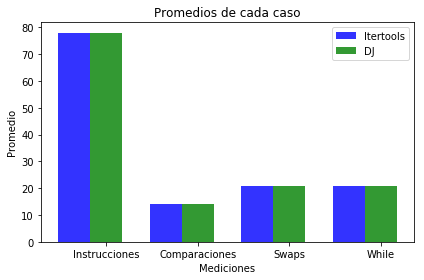

In [8]:
n_groups = 4
Itertools = (av_steps,av_swaps,av_comps,av_whlcomps)
DJ = (av_steps1,av_swaps1,av_comps1,av_whlcomps1)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, Itertools, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Itertools')
 
rects2 = plt.bar(index + bar_width, DJ, bar_width,
                 alpha=opacity,
                 color='g',
                 label='DJ')
 
plt.xlabel('Mediciones')
plt.ylabel('Promedio')
plt.title('Promedios de cada caso')
plt.xticks(index + bar_width, ('Instrucciones', 'Comparaciones', 'Swaps', 'While'))
plt.legend()
 
plt.tight_layout()
plt.show()